In [3]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
sns.set_style('darkgrid')

In [5]:
player = pd.read_feather('Data/TopScorer')
playtime = pd.read_feather('Data/TopScorer_Playtime')

In [6]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   player_id                    14 non-null     Int64  
 1   player_name                  14 non-null     object 
 2   current_age                  14 non-null     Int64  
 3   height_in_cm                 14 non-null     Int64  
 4   domestic_competition_id      14 non-null     object 
 5   club_name                    14 non-null     object 
 6   game_played                  14 non-null     float64
 7   club_play_minute             14 non-null     Int64  
 8   minutes_played               14 non-null     Int64  
 9   goal_per_game                14 non-null     float64
 10  last_season_goals            14 non-null     Int64  
 11  assist_per_game              14 non-null     float64
 12  last_season_assists          14 non-null     Int64  
 13  market_value_in_eur   

In [7]:
playtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_name      50 non-null     object
 1   season           50 non-null     Int64 
 2   season_playtime  50 non-null     Int64 
 3   match_played     50 non-null     object
dtypes: Int64(2), object(2)
memory usage: 1.8+ KB


In [8]:
for i in player.columns:
    if i == 'player_name' or i == 'club_name' or i == 'domestic_competition_id':
        player[i] = player[i].astype(str)
    else:
        player[i] = player[i].astype(float)
        
for i in playtime.columns:
    if i == 'player_name':
        playtime[i] = playtime[i].astype(str)
    else:
        playtime[i] = playtime[i].astype(int)

In [9]:
league = player['domestic_competition_id'].unique().tolist()
league_match = [34, 34, 34, 38, 38]
league_match_number = {league[i] : league_match[i] for i in range(len(league))}


In [10]:
def AttendRate(row):
    league = row['domestic_competition_id']
    playtime_in_club = row['club_play_minute']
    league_total_time = league_match_number[league] * 90
    rate = playtime_in_club/league_total_time
    return rate

In [11]:
player['Attendance_Rate_In_Club'] = player[['domestic_competition_id', 'club_play_minute']].apply(AttendRate, axis=1)

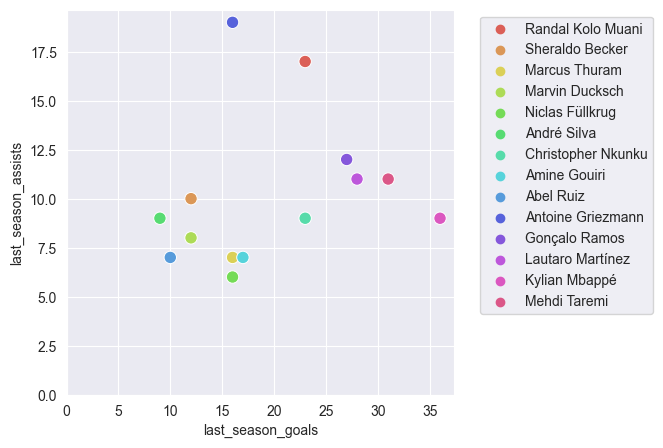

In [12]:
fig, ax =plt.subplots(figsize=(5,5))
ax = sns.scatterplot(data=player, x='last_season_goals', y='last_season_assists', hue='player_name', palette='hls', s=80)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='best')
plt.show()

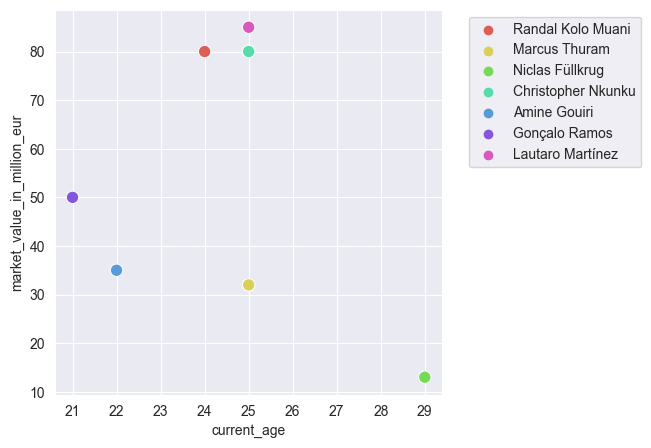

In [26]:
fig2, ax2 = plt.subplots(figsize=(5,5))

ax2 = sns.scatterplot(data=player, x='current_age', y='market_value_in_million_eur', hue='player_name', palette='hls', s=80)
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

<Axes: >

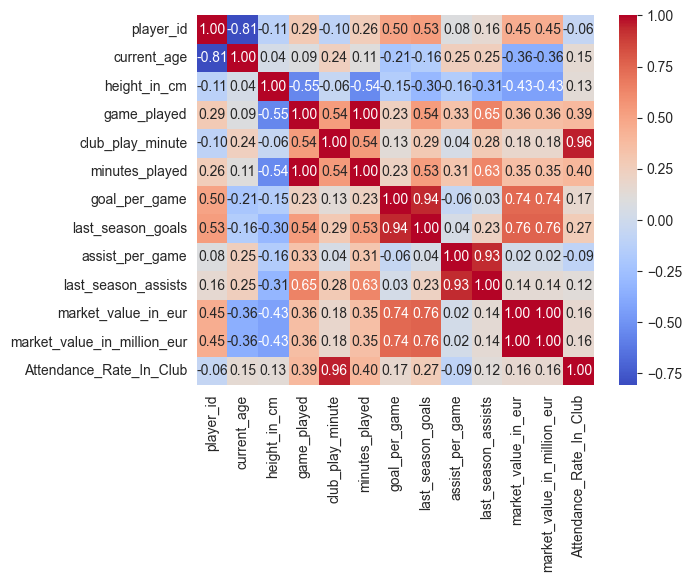

In [14]:
sns.heatmap(player.select_dtypes(include=['float', 'int']).corr(), annot=True, fmt='.2f',cmap='coolwarm')

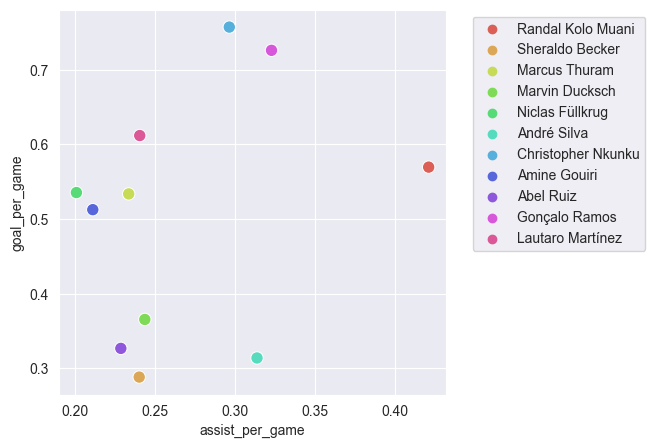

In [20]:
filtered = player[(player['current_age'] < 30) & (player['market_value_in_eur'] < 90000000)]

fig3 ,ax3 = plt.subplots(figsize=(5, 5))
ax3 = sns.scatterplot(data=filtered, x = 'assist_per_game', y = 'goal_per_game', hue = 'player_name', palette='hls', s = 80)
#ax3.set_xlim(left=0)
#ax3.set_ylim(bottom=0)
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.show()

In [23]:
filtered[filtered['goal_per_game'] >= filtered['goal_per_game'].mean()]  

,player_id,player_name,current_age,height_in_cm,domestic_competition_id,club_name,game_played,club_play_minute,minutes_played,goal_per_game,last_season_goals,assist_per_game,last_season_assists,market_value_in_eur,market_value_in_million_eur,Attendance_Rate_In_Club
0,487969.0,Randal Kolo Muani,24.0,187.0,L1,Eintracht Frankfurt,41.0,2647.0,3634.0,0.569620,23.0,0.421024,17.0,80000000.0,80.0,0.865033
2,318528.0,Marcus Thuram,25.0,192.0,L1,Borussia Mönchengladbach,30.0,2518.0,2698.0,0.533729,16.0,0.233506,7.0,32000000.0,32.0,0.822876
4,75489.0,Niclas Füllkrug,29.0,189.0,L1,SV Werder Bremen,30.0,2479.0,2689.0,0.535515,16.0,0.200818,6.0,13000000.0,13.0,0.810131
6,344381.0,Christopher Nkunku,25.0,178.0,L1,RB Leipzig,31.0,1897.0,2733.0,0.757409,23.0,0.296378,9.0,80000000.0,80.0,0.619935
7,418659.0,Amine Gouiri,22.0,181.0,FR1,Stade Rennais FC,34.0,2759.0,2985.0,0.512563,17.0,0.211055,7.0,35000000.0,35.0,0.901634
10,550550.0,Gonçalo Ramos,21.0,185.0,PO1,SL Benfica,38.0,2306.0,3346.0,0.726240,27.0,0.322773,12.0,50000000.0,50.0,0.753595
11,406625.0,Lautaro Martínez,25.0,174.0,IT1,Inter Milan,46.0,2574.0,4118.0,0.611948,28.0,0.240408,11.0,85000000.0,85.0,0.752632


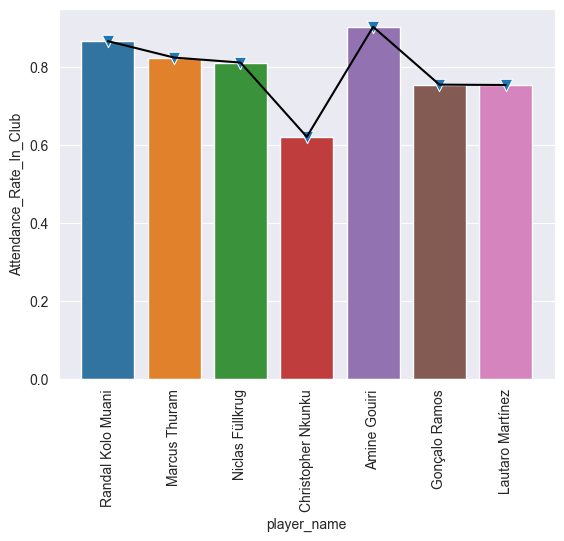

In [24]:
player = filtered[filtered['goal_per_game'] >= filtered['goal_per_game'].mean()]  
fig, ax = plt.subplots()
ax = sns.barplot(data=player, x='player_name', y='Attendance_Rate_In_Club')
ax = sns.lineplot(data=player, x='player_name', y='Attendance_Rate_In_Club', color='black')
ax = sns.scatterplot(data=player, x='player_name', y='Attendance_Rate_In_Club', s=80, marker='v')
plt.xticks(rotation=90)
plt.show()

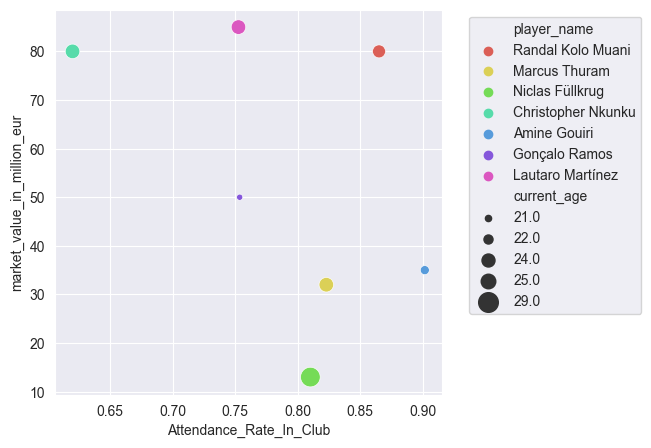

,player_id,player_name,current_age,height_in_cm,domestic_competition_id,club_name,game_played,club_play_minute,minutes_played,goal_per_game,last_season_goals,assist_per_game,last_season_assists,market_value_in_eur,market_value_in_million_eur,Attendance_Rate_In_Club
0,487969.0,Randal Kolo Muani,24.0,187.0,L1,Eintracht Frankfurt,41.0,2647.0,3634.0,0.569620,23.0,0.421024,17.0,80000000.0,80.0,0.865033
2,318528.0,Marcus Thuram,25.0,192.0,L1,Borussia Mönchengladbach,30.0,2518.0,2698.0,0.533729,16.0,0.233506,7.0,32000000.0,32.0,0.822876
4,75489.0,Niclas Füllkrug,29.0,189.0,L1,SV Werder Bremen,30.0,2479.0,2689.0,0.535515,16.0,0.200818,6.0,13000000.0,13.0,0.810131
6,344381.0,Christopher Nkunku,25.0,178.0,L1,RB Leipzig,31.0,1897.0,2733.0,0.757409,23.0,0.296378,9.0,80000000.0,80.0,0.619935
7,418659.0,Amine Gouiri,22.0,181.0,FR1,Stade Rennais FC,34.0,2759.0,2985.0,0.512563,17.0,0.211055,7.0,35000000.0,35.0,0.901634
10,550550.0,Gonçalo Ramos,21.0,185.0,PO1,SL Benfica,38.0,2306.0,3346.0,0.726240,27.0,0.322773,12.0,50000000.0,50.0,0.753595
11,406625.0,Lautaro Martínez,25.0,174.0,IT1,Inter Milan,46.0,2574.0,4118.0,0.611948,28.0,0.240408,11.0,85000000.0,85.0,0.752632


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'player' is your DataFrame
fig2, ax2 = plt.subplots(figsize=(5, 5))

# Create scatter plot
ax2 = sns.scatterplot(
    data=player, 
    x='Attendance_Rate_In_Club', 
    y='market_value_in_million_eur', 
    hue='player_name', 
    size='current_age', 
    palette='hls', 
    sizes=(20, 200)  # Adjust the range of sizes as needed
)

# Adjust legend
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

player[player['Attendance_Rate_In_Club'] > 0.8]